In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/'
output_path =  '/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_results/'

In [4]:
image_path = "/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/5.jpg"
image = cv.imread("/content/drive/MyDrive/UGP_EE492A/PSO_results/roi_images/5.jpg")

In [5]:
def LoG_filter_opencv(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution using OpenCV filter2D
    result = cv2.filter2D(image, -1, kernel)

    return result

In [6]:
sigma = 3.0

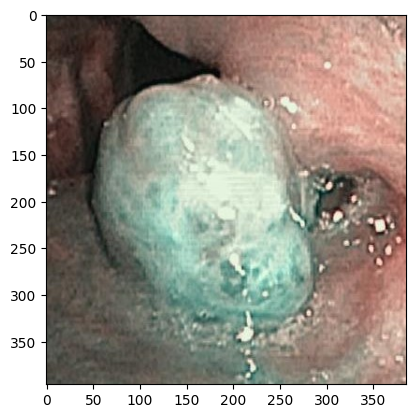

In [7]:
# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

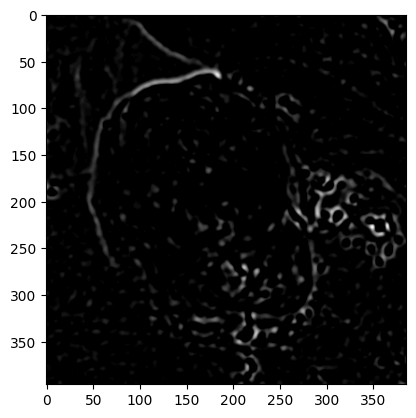

In [8]:
image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)  # Replace 'path_to_your_image.png' with your image path
filtered_image = LoG_filter_opencv(image, sigma)
filtered_image = cv2.convertScaleAbs(filtered_image)
plt.imshow(filtered_image, cmap="gray")

In [9]:
original_images =[]
output_images =[]

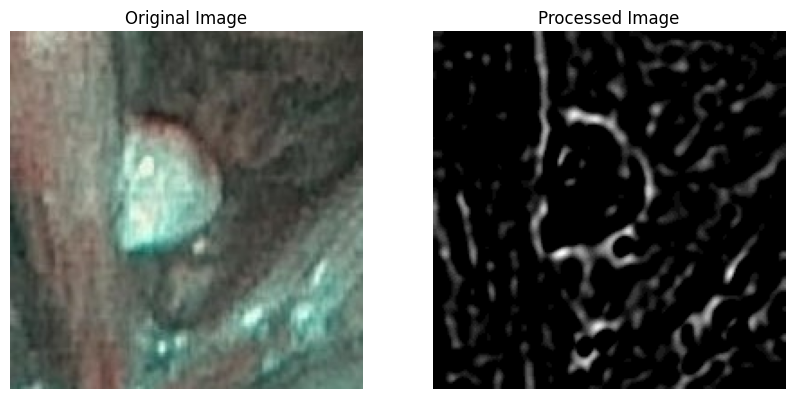

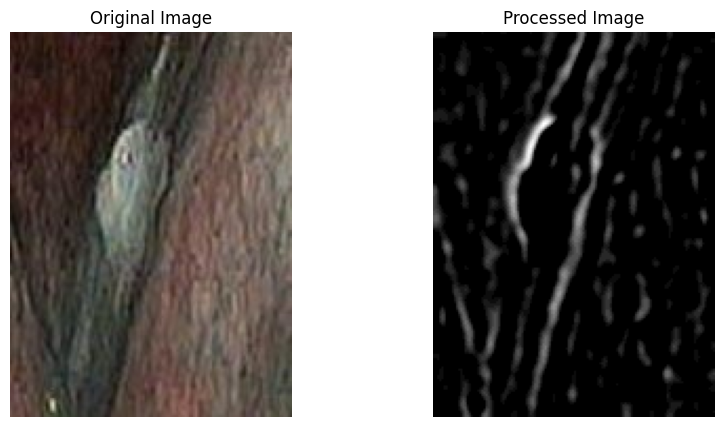

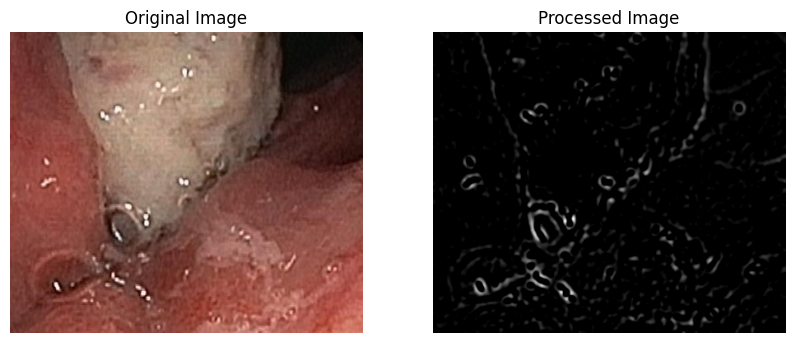

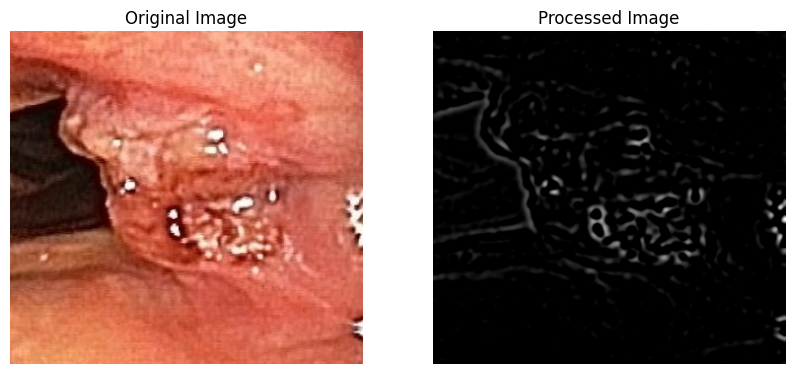

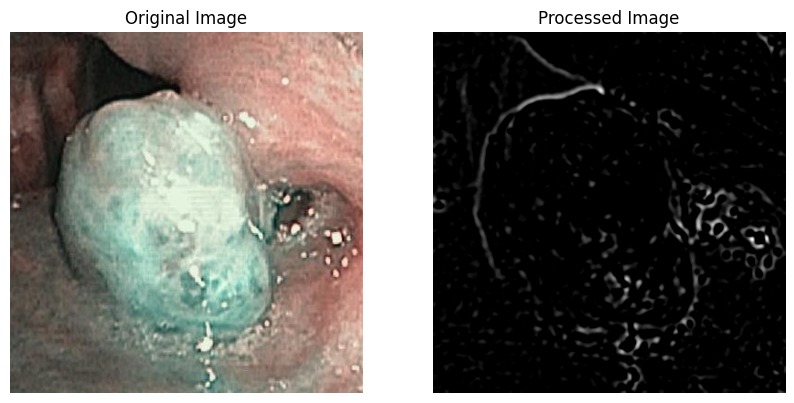

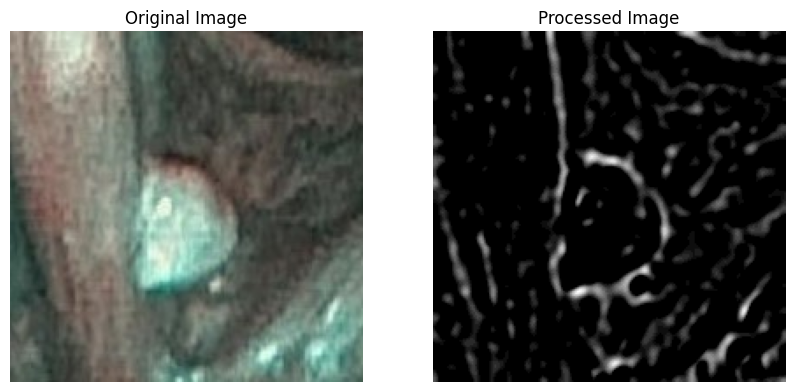

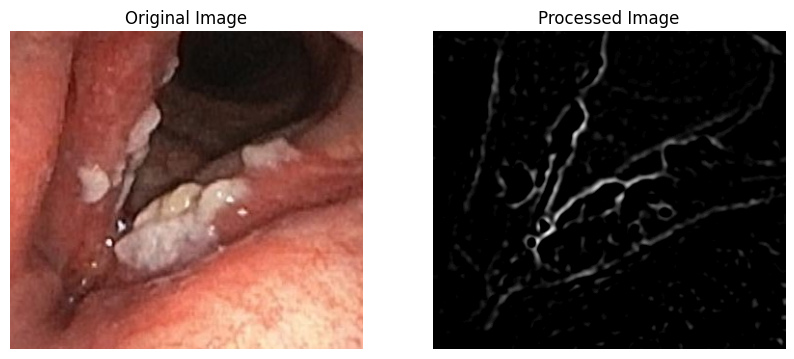

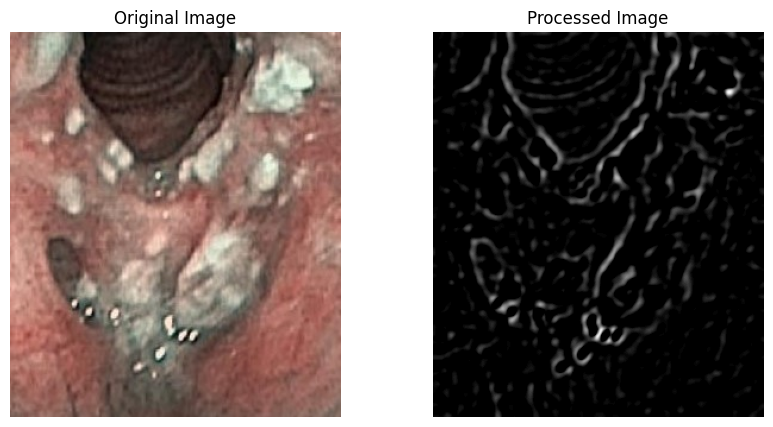

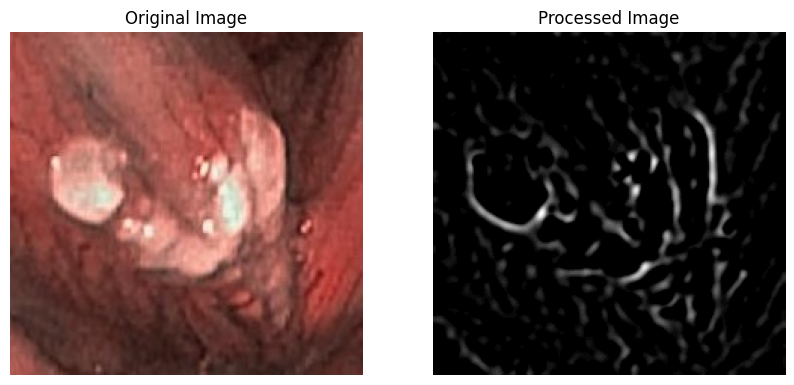

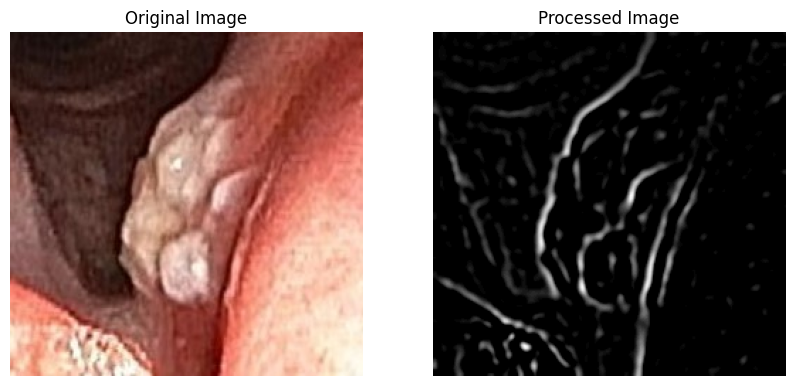

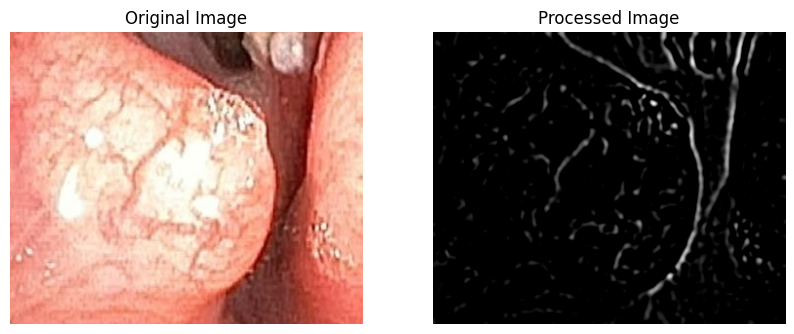

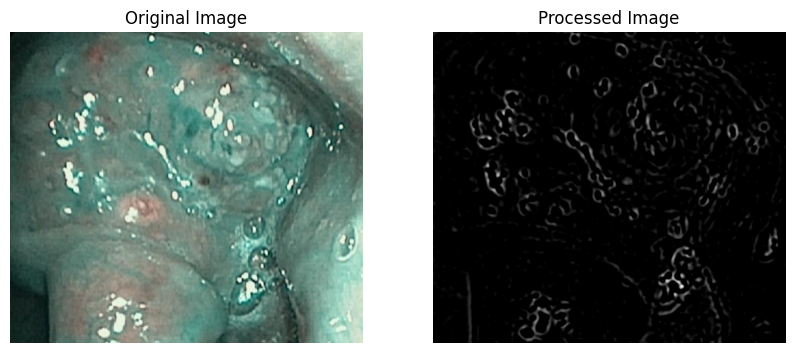

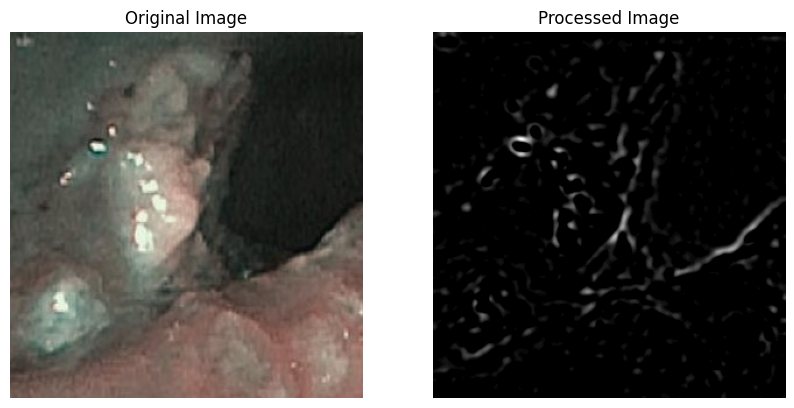

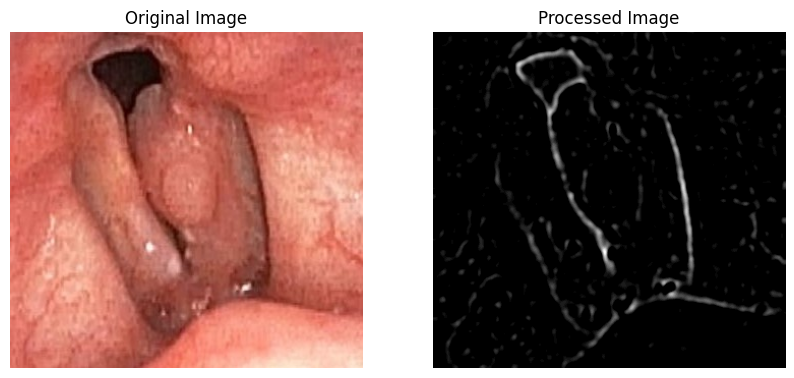

In [10]:
for im in os.listdir(dir_path):

  img = cv2.imread(dir_path + im , cv2.IMREAD_GRAYSCALE)
  # img = cv.imread(dir_path+im,1)
  # cv2_imshow(img)
  original_images.append(img)

  out_img = LoG_filter_opencv(img, sigma)

  # Normalize pixel values to [0, 255]
  out_img_norm = cv2.normalize(out_img, None, 0, 255, cv2.NORM_MINMAX)

  # Convert to uint8 data type
  out_img_uint8 = out_img_norm.astype(np.uint8)

  # out_img1 = LoG_filter_opencv(img, sigma)
  # out_img = cv2.convertScaleAbs(out_img1)
  output_images.append(out_img_uint8)

  # Display img and out_img side by side
  img1 = cv2.imread(dir_path+im)
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  axes[0].set_title('Original Image')
  axes[0].axis('off')
  axes[1].imshow(out_img, cmap='gray')
  axes[1].set_title('Processed Image')
  axes[1].axis('off')
  plt.show()

  # Save the output image to the output folder
  output_image_path = os.path.join(output_path, im)
  # print(output_image_path)
  cv2.imwrite(output_image_path, out_img_uint8)